<a href="https://colab.research.google.com/github/soumyasworupadash/RoadAccident_dashboard/blob/main/ROAD_ACCIDENTS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/Road Accident Data.xlsx - Data (1).csv')

# Display original shape
print("Original shape:", df.shape)
# Remove rows with any null (NaN) values
df_cleaned = df.dropna()
# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display cleaned shape
print("Cleaned shape:", df_cleaned.shape)
# Save the cleaned dataset (optional)
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


Original shape: (18664, 21)
Cleaned shape: (139, 21)


In [ ]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('/content/cleaned_dataset.csv')

# Now perform EDA
print(df_cleaned.head())
print(df_cleaned.info())
print(df_cleaned.describe())
print(df_cleaned.isnull().sum())
print(df_cleaned.duplicated().sum())




  Accident_Index Accident Date Day_of_Week              Junction_Control  \
0      BS0000196     5/13/2021   Wednesday      Give way or uncontrolled   
1      BS0000415      9/4/2021      Friday           Auto traffic signal   
2      BS0000477     10/6/2021     Tuesday           Auto traffic signal   
3      BS0000855     9/24/2021    Thursday  Data missing or out of range   
4      BS0000890     10/5/2021      Monday      Give way or uncontrolled   

                       Junction_Detail Accident_Severity   Latitude  \
0              T or staggered junction            Slight  51.495373   
1                           Crossroads            Slight  51.497136   
2              T or staggered junction            Slight  51.495660   
3  Not at junction or within 20 metres           Serious  51.511819   
4              T or staggered junction            Slight  51.513312   

  Light_Conditions Local_Authority_(District)  \
0         Daylight     Kensington and Chelsea   
1         Daylight

#**Accident Severity Distribution**

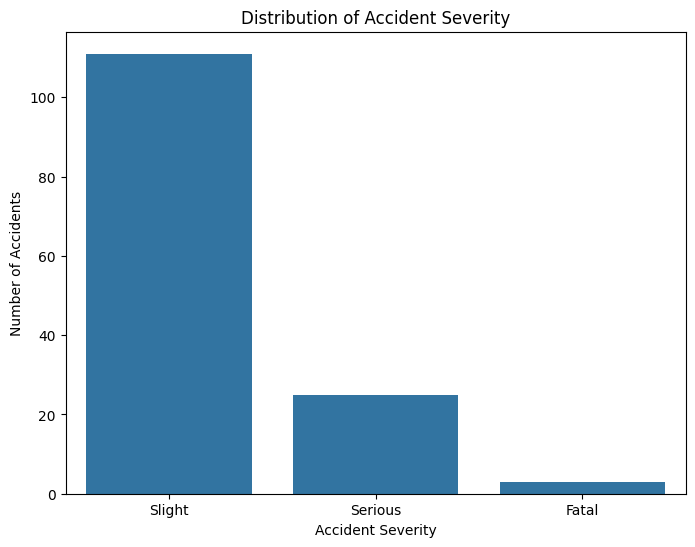

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Accident_Severity' is the column name for accident severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_Severity', data=df_cleaned, order=df_cleaned['Accident_Severity'].value_counts().index)
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()

#**Top 10 Accident-Prone Districts**

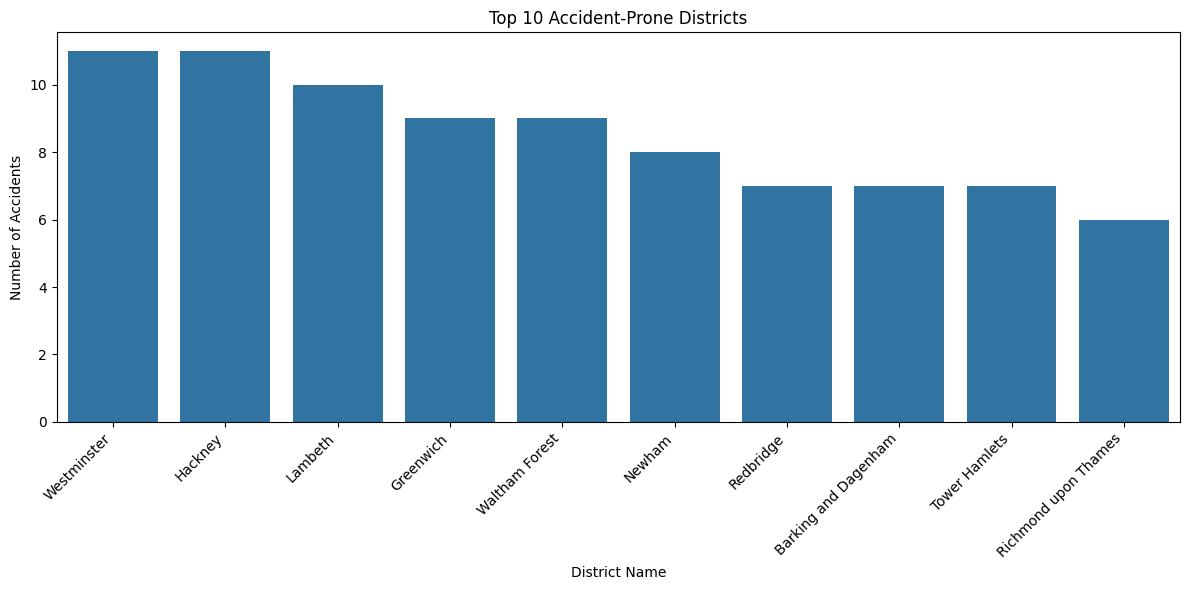

In [ ]:

# Assuming 'District_Name' is the column name for district
top_10_districts = df_cleaned['Local_Authority_(District)'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_districts.index, y=top_10_districts.values)
plt.title('Top 10 Accident-Prone Districts')
plt.xlabel('District Name')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#**Day-of-Week Trends**

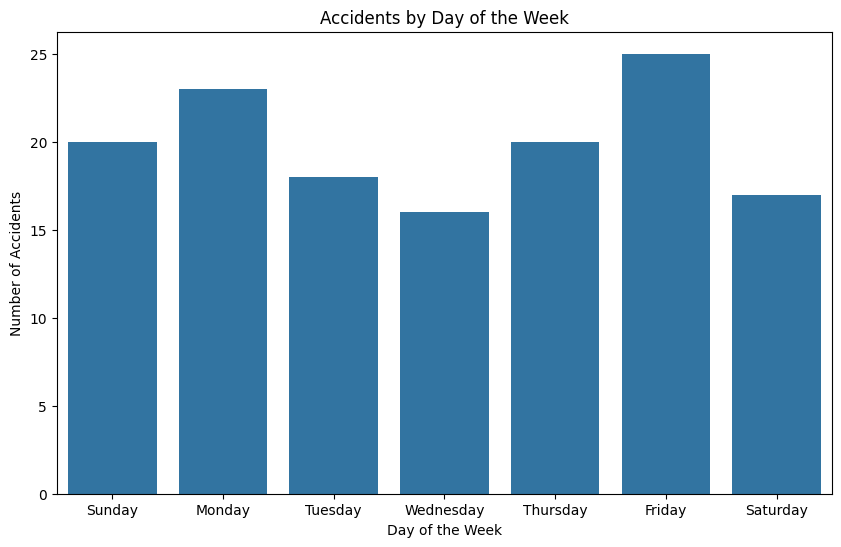

In [ ]:
# Assuming 'Day_of_Week' is the column name for the day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df_cleaned, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

#**No.of Accidents due to Light Conditions**

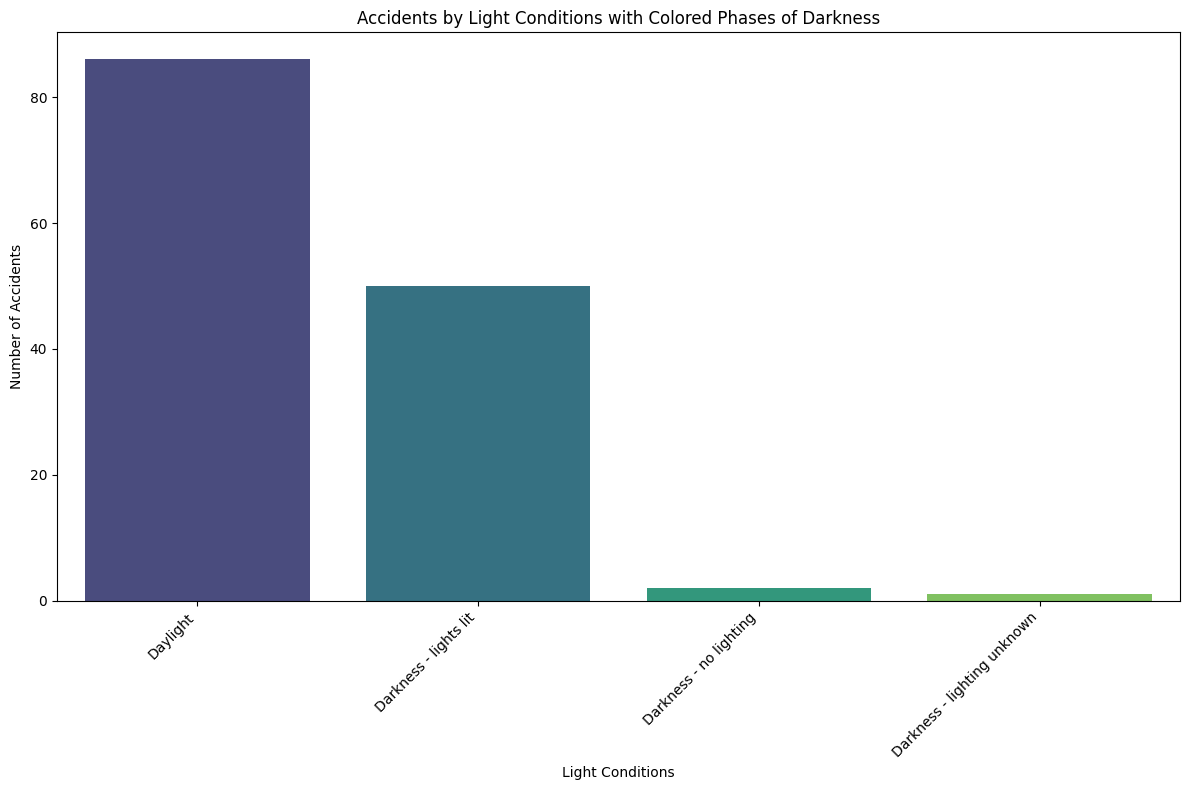

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.countplot(x='Light_Conditions', hue='Light_Conditions', data=df_cleaned,
              order=df_cleaned['Light_Conditions'].value_counts().index, palette='viridis') # You can change the palette

plt.title('Accidents by Light Conditions with Colored Phases of Darkness')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#**Correlation Insights (Heatmap)**

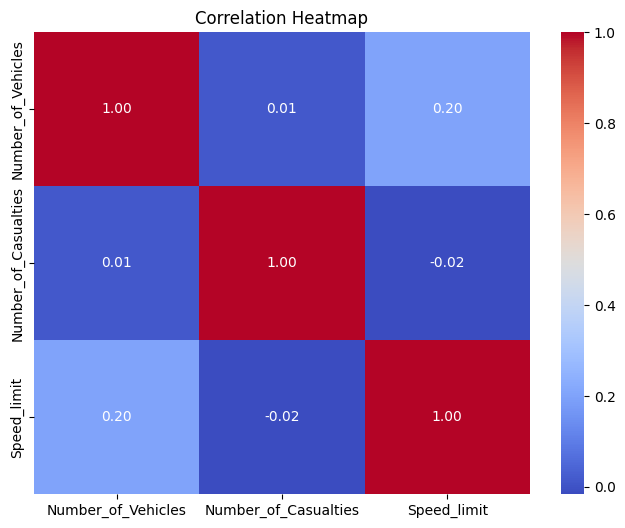

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']

# Calculate the correlation matrix
correlation_matrix = df_cleaned[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#**Time-Based Trends**

#**Accidents by Hour of Day :**

0   2025-05-29 19:00:00
1   2025-05-29 15:55:00
2   2025-05-29 17:36:00
3   2025-05-29 08:35:00
4   2025-05-29 16:10:00
Name: Time, dtype: datetime64[ns]
0    19
1    15
2    17
3     8
4    16
Name: Hour_of_Day, dtype: int32
int32


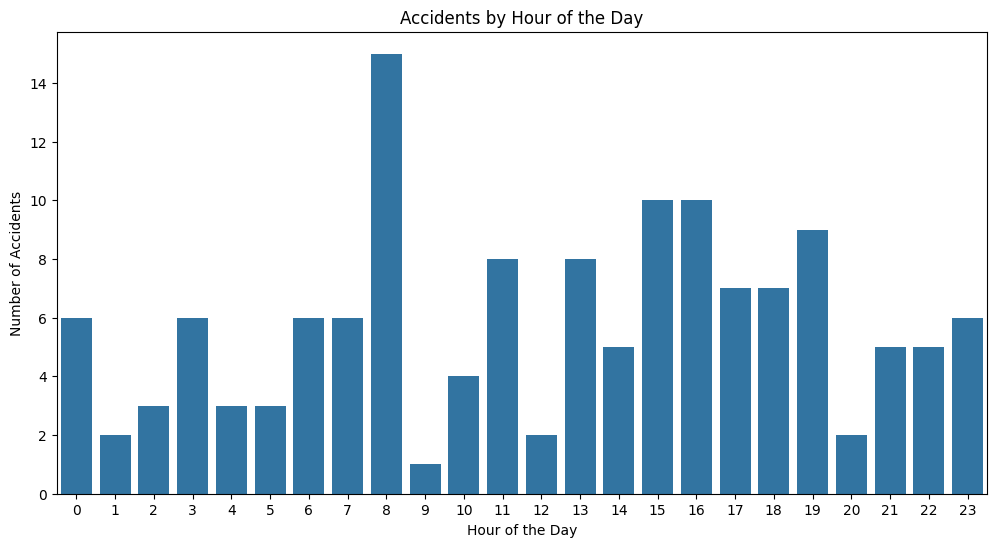

In [ ]:
# Assuming 'Datetime_Column' is your datetime column
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'])
df_cleaned['Hour_of_Day'] = df_cleaned['Time'].dt.hour

print(df_cleaned['Time'].head()) # Check the first few values of the converted 'Time' column
print(df_cleaned['Hour_of_Day'].head()) # Check the first few values of the 'Hour_of_Day' column
print(df_cleaned['Hour_of_Day'].dtype) # Check the data type of the 'Hour_of_Day' column

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour_of_Day', data=df_cleaned, order=range(24))
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.show()

#**Accidents By Month**

<ipython-input-24-db1adff3cd3b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df_cleaned, order=range(1, 13), palette='Set2')


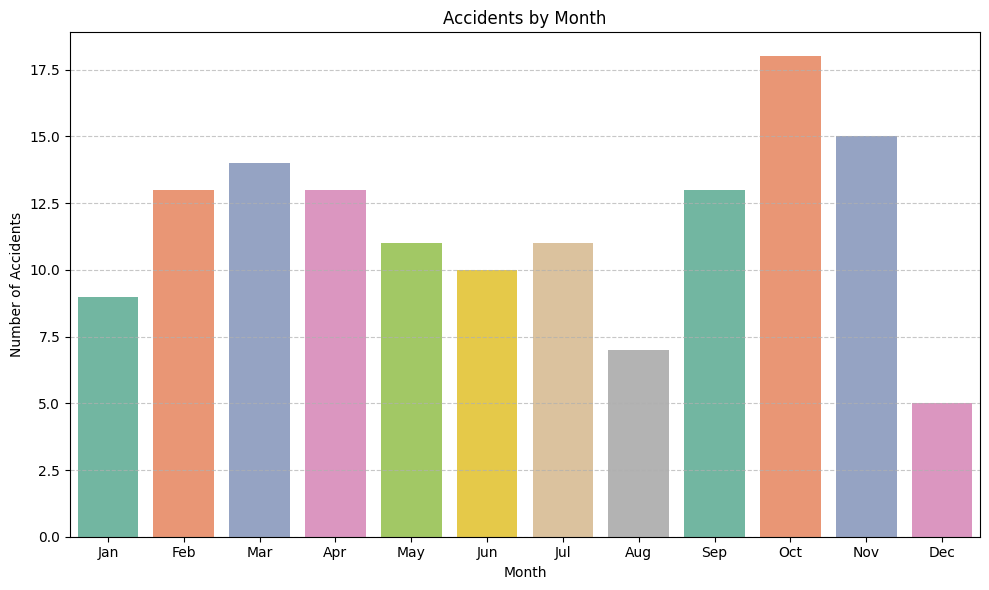

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Accident Date is in datetime format
df_cleaned['Accident Date'] = pd.to_datetime(df_cleaned['Accident Date'], errors='coerce')
df_cleaned['Month'] = df_cleaned['Accident Date'].dt.month

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df_cleaned, order=range(1, 13), palette='Set2')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[i - 1 for i in range(1, 13)],
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#**Accidents By Weather Conditions**

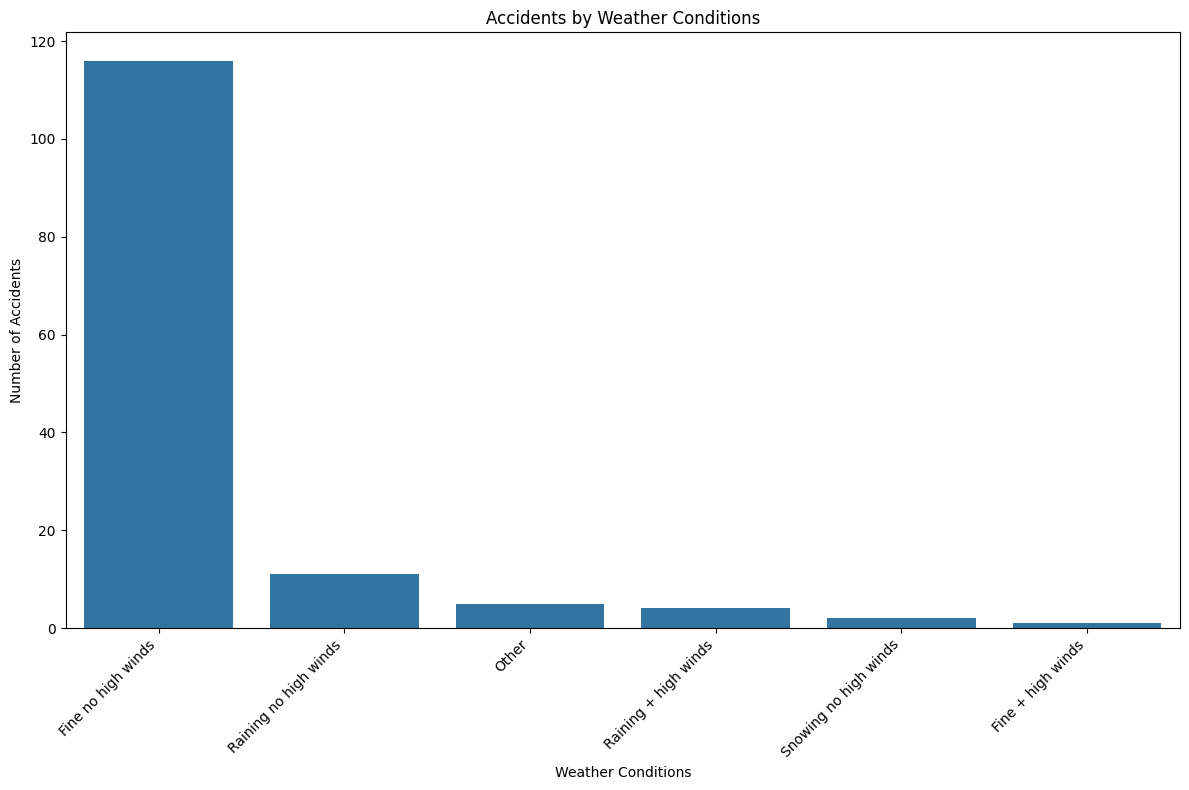

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Weather_Conditions' is the column name for weather conditions
plt.figure(figsize=(12, 8))
sns.countplot(x='Weather_Conditions', data=df_cleaned, order=df_cleaned['Weather_Conditions'].value_counts().index)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right') # Rotate labels if needed for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

#**Accidents Severity By Road_Type**

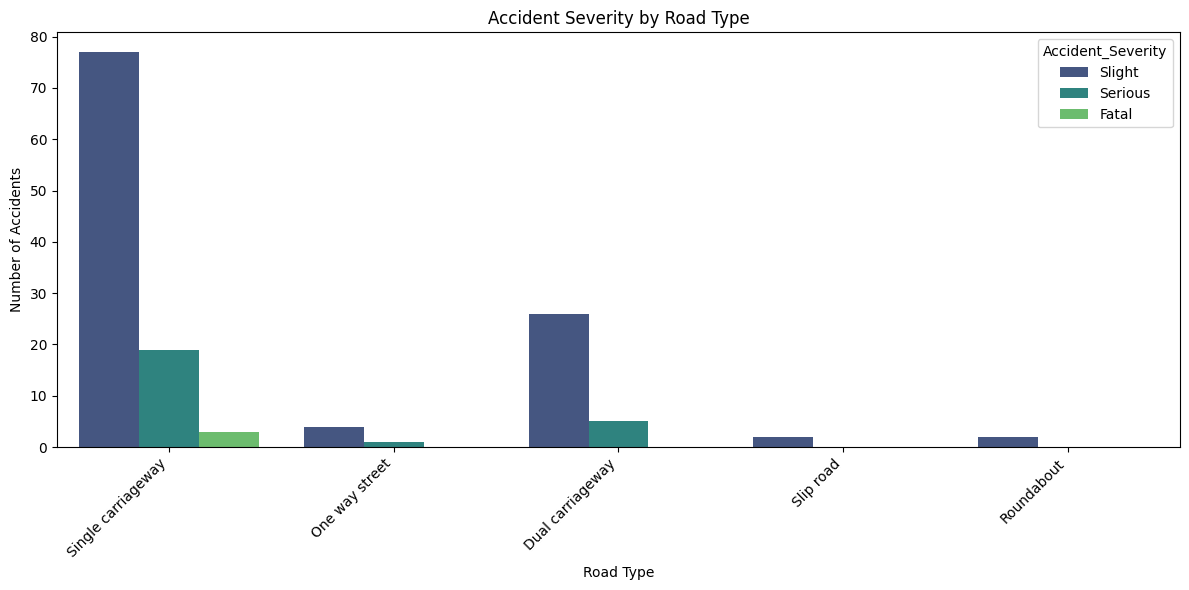

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize=(12, 6))
sns.countplot(x='Road_Type', hue='Accident_Severity', data=df_cleaned, palette='viridis')
plt.title('Accident Severity by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#**Accidents By Junction Control**

<ipython-input-29-c172ea767523>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Junction_Control', data=df_cleaned, order=df_cleaned['Junction_Control'].value_counts().index, palette='viridis')


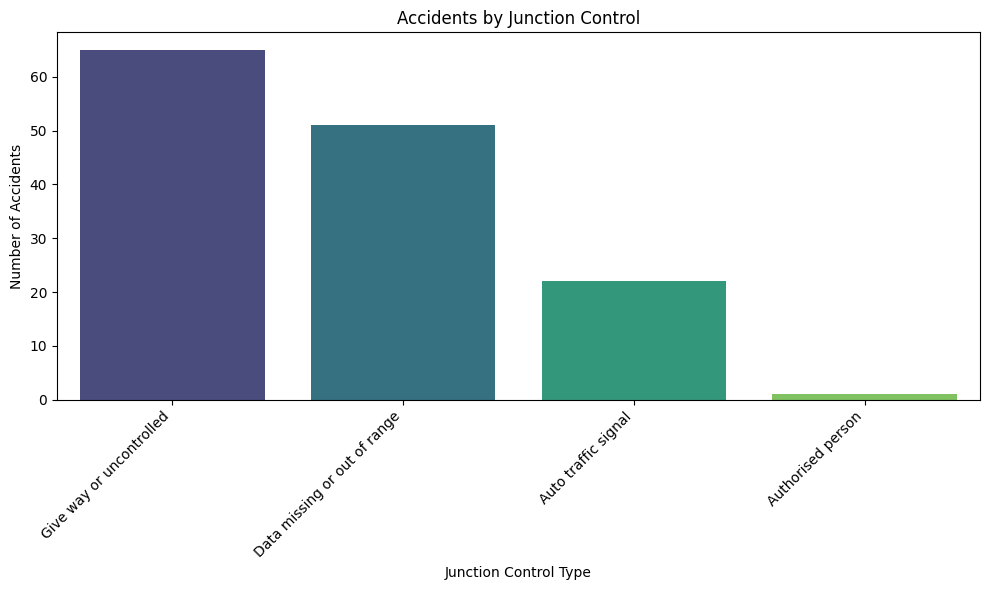

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'Junction_Control' is the column name for junction control
plt.figure(figsize=(10, 6))
sns.countplot(x='Junction_Control', data=df_cleaned, order=df_cleaned['Junction_Control'].value_counts().index, palette='viridis')
plt.title('Accidents by Junction Control')
plt.xlabel('Junction Control Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout
plt.show()

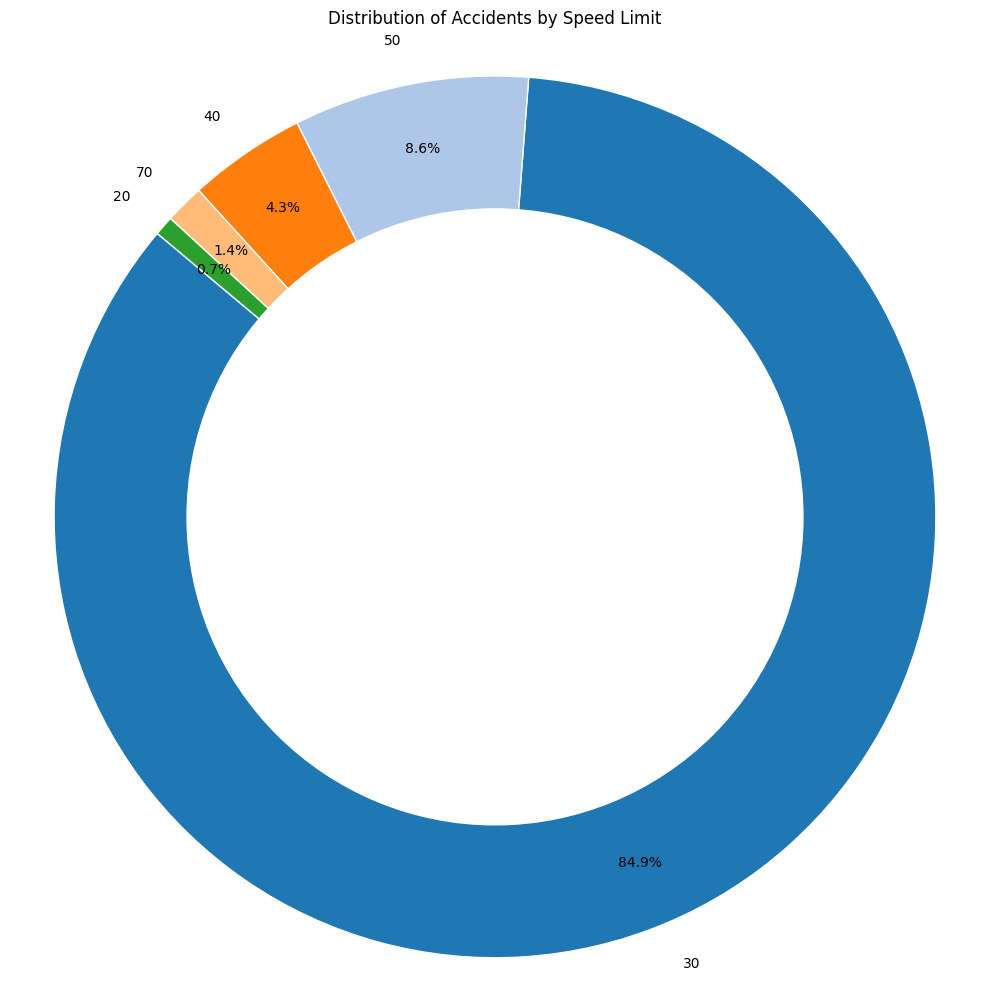

In [ ]:
# prompt: visualize the graph of no.of accidents with respect to speed limit in pie charrt use different color and appropriate disnce between arc

import matplotlib.pyplot as plt
# Group by speed limit and count accidents
speed_limit_counts = df_cleaned['Speed_limit'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(speed_limit_counts, labels=speed_limit_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('tab20', len(speed_limit_counts)),  # Use a color palette
        pctdistance=0.85,  # Distance of percentage from center
        wedgeprops={'edgecolor': 'white', 'linewidth': 1, 'antialiased': True}) # Add edge color and thickness for separation

# Add a circle at the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Accidents by Speed Limit', y=1.02) # Adjust title position
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()